In [7]:
#import our libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import plotly.graph_objects as go
import plotly.express as px
import xarray as xr
import netCDF4 as nc
from netCDF4 import Dataset as NetCDFFile

In [8]:
#import the data file (delimited coordinates of our site of interest)
ds = xr.open_dataset('C:/Users/nicol/Documents/GitHub/CocoGreenSeas/cmems_mod_glo_bgc_my_0.25_P1M-m_1655149224337_cortado.nc')

In [9]:
#our latitudes should be from 28 to 31
ds.latitude

<xarray.DataArray 'latitude' (latitude: 13)>
array([28.  , 28.25, 28.5 , 28.75, 29.  , 29.25, 29.5 , 29.75, 30.  , 30.25,
       30.5 , 30.75, 31.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 28.0 28.25 28.5 28.75 ... 30.25 30.5 30.75 31.0
Attributes:
    valid_min:            28.0
    valid_max:            31.0
    step:                 0.25
    units:                degrees_north
    unit_long:            Degrees North
    long_name:            Latitude
    standard_name:        latitude
    axis:                 Y
    _ChunkSizes:          681
    _CoordinateAxisType:  Lat

In [10]:
#our  longitudes should be from -94 to -88
ds.longitude

<xarray.DataArray 'longitude' (longitude: 25)>
array([-94.  , -93.75, -93.5 , -93.25, -93.  , -92.75, -92.5 , -92.25, -92.  ,
       -91.75, -91.5 , -91.25, -91.  , -90.75, -90.5 , -90.25, -90.  , -89.75,
       -89.5 , -89.25, -89.  , -88.75, -88.5 , -88.25, -88.  ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -94.0 -93.75 -93.5 ... -88.5 -88.25 -88.0
Attributes:
    valid_min:            -94.0
    valid_max:            -88.0
    step:                 0.25
    units:                degrees_east
    unit_long:            Degrees East
    long_name:            Longitude
    standard_name:        longitude
    axis:                 X
    _ChunkSizes:          1440
    _CoordinateAxisType:  Lon

In [11]:
mean= ds.groupby("time.year").mean()
mean.year

<xarray.DataArray 'year' (year: 16)>
array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020], dtype=int64)
Coordinates:
  * year     (year) int64 2005 2006 2007 2008 2009 ... 2016 2017 2018 2019 2020

In [12]:
#numerical analysis

# un promedio espacial por mes 
prom = ds.mean(dim=('latitude','longitude','depth'), skipna=None) #promedio en xarray
df_prom = prom.to_dataframe() #pasar a pandas df
df_prom = df_prom.reset_index()

# una mediana espacial por mes
mediana = ds.median(dim=('latitude','longitude','depth'), skipna=None) #mediana
df_mediana = mediana.to_dataframe() #pasar a pandas df
df_mediana = df_mediana.reset_index()

# desviación estándar cada mes 
std = ds.std(dim=('latitude','longitude','depth'), skipna=None) #desviación estándar
df_std = std.to_dataframe() #pasar a pandas df
df_std = df_std.reset_index()

In [13]:
ds_pd=ds.to_dataframe()
ds_pd #pasar xarray a dataframe

spco2          o2  \
time                latitude longitude depth                            
2005-01-16 12:00:00 28.0     -94.00    0.50576  30.438835  218.372131   
                             -93.75    0.50576  30.438154  218.315552   
                             -93.50    0.50576  30.427561  218.390457   
                             -93.25    0.50576  30.439611  218.423874   
                             -93.00    0.50576  30.482248  218.405502   
...                                                   ...         ...   
2020-12-16 12:00:00 31.0     -89.00    0.50576        NaN         NaN   
                             -88.75    0.50576        NaN         NaN   
                             -88.50    0.50576        NaN         NaN   
                             -88.25    0.50576        NaN         NaN   
                             -88.00    0.50576        NaN         NaN   

                                                     chl       no3       po4  \
time                latitude longitude depth                                   
2005-01-16 12:00:00 28.0     -94.00    0.50576  0.637364  0.310671  0.013918   
                             -93.75    0.50576  0.561159  0.274658  0.010410   
                             -93.50    0.50576  0.529967  0.245205  0.007518   
                             -93.25    0.50576  0.531111  0.246435  0.007535   
                             -93.00    0.50576  0.553932  0.260694  0.008509   
...                                                  ...       ...       ...   
2020-12-16 12:00:00 31.0     -89.00    0.50576       NaN       NaN       NaN   
                             -88.75    0.50576       NaN       NaN       NaN   
                             -88.50    0.50576       NaN       NaN       NaN   
                             -88.25    0.50576       NaN       NaN       NaN   
                             -88.00    0.50576       NaN       NaN       NaN   

                                                    phyc        si        ph  \
time                latitude longitude depth                                   
2005-01-16 12:00:00 28.0     -94.00    0.50576  2.024342  4.442899  8.139993   
                             -93.75    0.50576  1.860929  4.215192  8.139948   
                             -93.50    0.50576  1.812602  4.113436  8.140061   
                             -93.25    0.50576  1.821451  4.107601  8.139939   
                             -93.00    0.50576  1.881953  4.090812  8.139462   
...                                                  ...       ...       ...   
2020-12-16 12:00:00 31.0     -89.00    0.50576       NaN       NaN       NaN   
                             -88.75    0.50576       NaN       NaN       NaN   
                             -88.50    0.50576       NaN       NaN       NaN   
                             -88.25    0.50576       NaN       NaN       NaN   
                             -88.00    0.50576       NaN       NaN       NaN   

                                                     nppv        fe  
time                latitude longitude depth                         
2005-01-16 12:00:00 28.0     -94.00    0.50576  18.611565  0.001284  
                             -93.75    0.50576  16.947258  0.001125  
                             -93.50    0.50576  16.688707  0.001030  
                             -93.25    0.50576  16.987892  0.000996  
                             -93.00    0.50576  17.705801  0.000988  
...                                                   ...       ...  
2020-12-16 12:00:00 31.0     -89.00    0.50576        NaN       NaN  
                             -88.75    0.50576        NaN       NaN  
                             -88.50    0.50576        NaN       NaN  
                             -88.25    0.50576        NaN       NaN  
                             -88.00    0.50576        NaN       NaN  

[62400 rows x 10 columns]

Text(0, 0.5, 'Nitrate (mmol/$m^3$)')

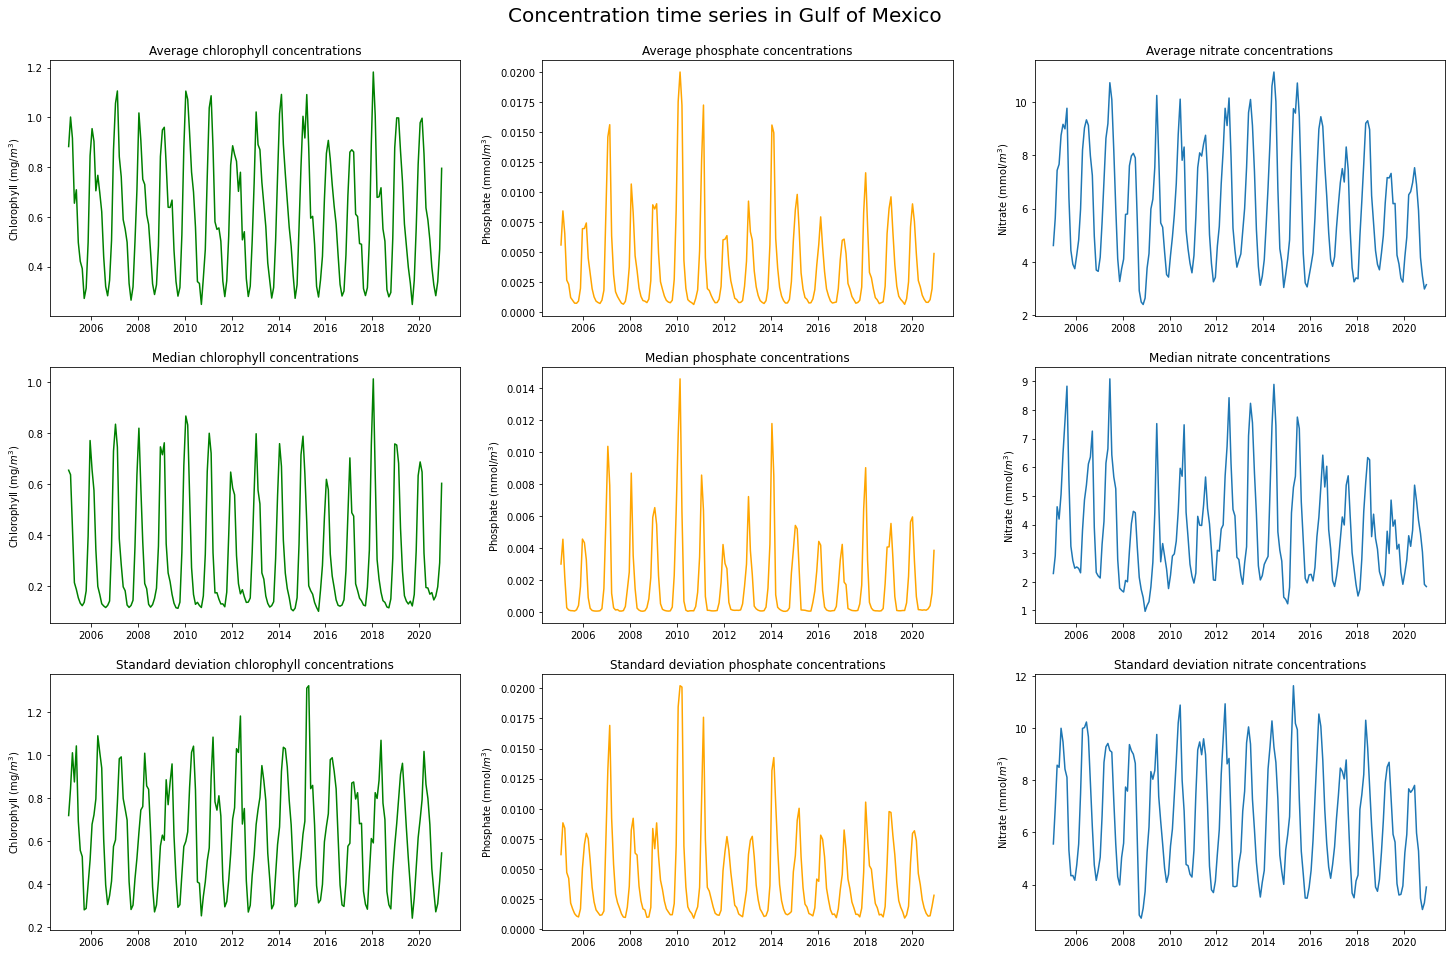

In [14]:
# How do these concentrations very with time? 

# PLOT TIME SERIES (averaged over space)
fig, axs = plt.subplots(3, 3, figsize=(25,15))
fig.suptitle('Concentration time series in Gulf of Mexico', fontsize=20)
plt.subplots_adjust(top=0.93)

######## For averages #########
#chlorophyll
axs[0, 0].plot(df_prom['time'], df_prom['chl'], 'green')
axs[0, 0].set_title('Average chlorophyll concentrations')
axs[0, 0].set_ylabel("Chlorophyll (mg/$m^3$)") 

#po4
axs[0, 1].plot(df_prom['time'], df_prom['po4'], 'orange')
axs[0, 1].set_title('Average phosphate concentrations')
axs[0, 1].set_ylabel("Phosphate (mmol/$m^3$)") 

#no3
axs[0, 2].plot(df_prom['time'], df_prom['no3'])
axs[0, 2].set_title('Average nitrate concentrations')
axs[0, 2].set_ylabel("Nitrate (mmol/$m^3$)") 

######## For median values #########
#chlorophyll
axs[1, 0].plot(df_mediana['time'], df_mediana['chl'], 'green')
axs[1, 0].set_title('Median chlorophyll concentrations')
axs[1, 0].set_ylabel("Chlorophyll (mg/$m^3$)") 

#po4
axs[1, 1].plot(df_mediana['time'], df_mediana['po4'], 'orange')
axs[1, 1].set_title('Median phosphate concentrations')
axs[1, 1].set_ylabel("Phosphate (mmol/$m^3$)") 

#no3
axs[1, 2].plot(df_mediana['time'], df_mediana['no3'])
axs[1, 2].set_title('Median nitrate concentrations')
axs[1, 2].set_ylabel("Nitrate (mmol/$m^3$)") 

######## For standard deviations #########
#chlorophyll
axs[2, 0].plot(df_std['time'], df_std['chl'], 'green')
axs[2, 0].set_title('Standard deviation chlorophyll concentrations')
axs[2, 0].set_ylabel("Chlorophyll (mg/$m^3$)") 

#po4
axs[2, 1].plot(df_std['time'], df_std['po4'], 'orange')
axs[2, 1].set_title('Standard deviation phosphate concentrations')
axs[2, 1].set_ylabel("Phosphate (mmol/$m^3$)") 

#no3
axs[2, 2].plot(df_std['time'], df_std['no3'])
axs[2, 2].set_title('Standard deviation nitrate concentrations')
axs[2, 2].set_ylabel("Nitrate (mmol/$m^3$)") 


#fig.savefig("Full_Hysteresis.png", bbox_inches = 'tight', dpi=300)

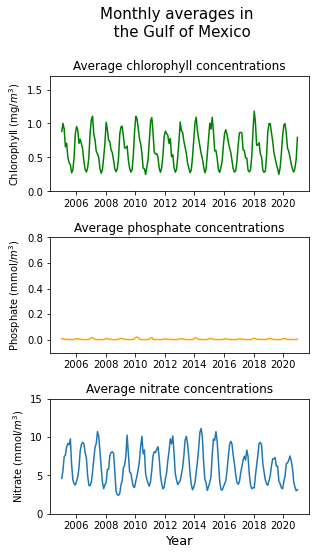

In [45]:
# How do these concentrations very with time? 

# PLOT TIME SERIES (averaged over space)
fig, axs = plt.subplots(3, 1, figsize=(4.5,8))
fig.suptitle('Monthly averages in \n the Gulf of Mexico', fontsize=15)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.86, 
                    wspace=0.4, 
                    hspace=0.4)

######## For averages #########
#chlorophyll
axs[0].plot(df_prom['time'], df_prom['chl'], 'green')
axs[0].set_ylim(0, 1.7)
axs[0].set_title('Average chlorophyll concentrations')
axs[0].set_ylabel("Chlorophyll (mg/$m^3$)") 

#po4
axs[1].plot(df_prom['time'], df_prom['po4'], 'orange')
axs[1].set_ylim(-0.1, 0.8)
axs[1].set_title('Average phosphate concentrations')
axs[1].set_ylabel("Phosphate (mmol/$m^3$)") 

#no3
axs[2].plot(df_prom['time'], df_prom['no3'])
axs[2].set_ylim(0, 15)
axs[2].set_title('Average nitrate concentrations')
axs[2].set_ylabel("Nitrate (mmol/$m^3$)") 
axs[2].set_xlabel("Year", fontsize=13) 


plt.savefig('golfo_de_mexico_timeseries.png', dpi=500, bbox_inches='tight')

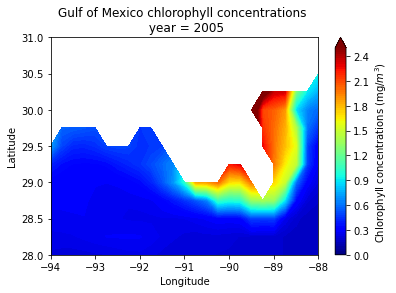

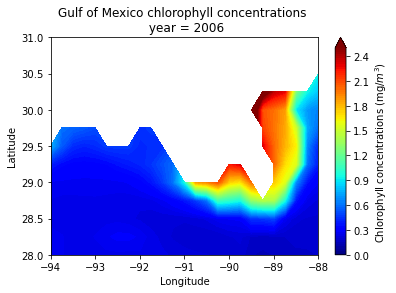

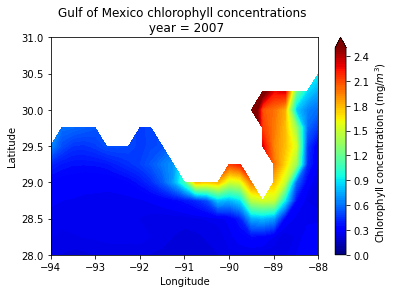

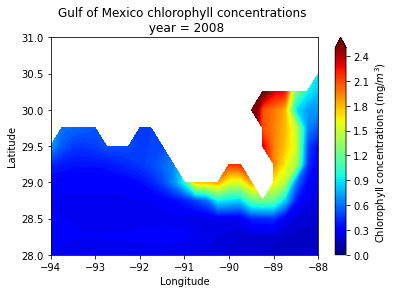

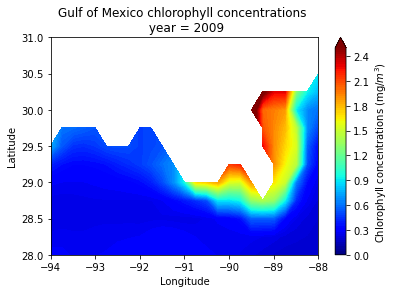

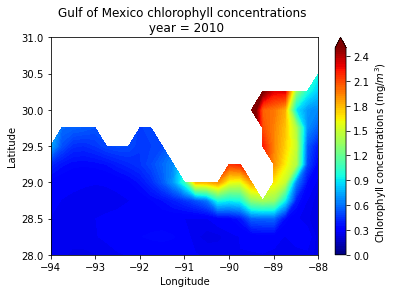

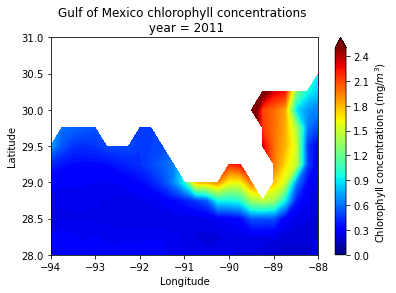

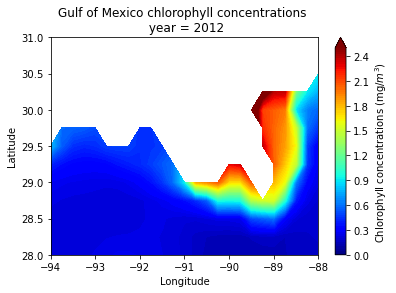

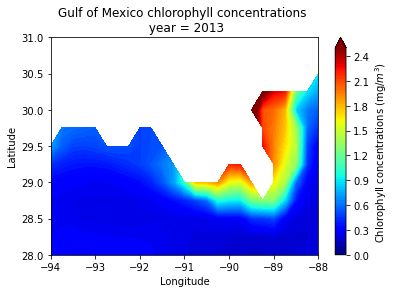

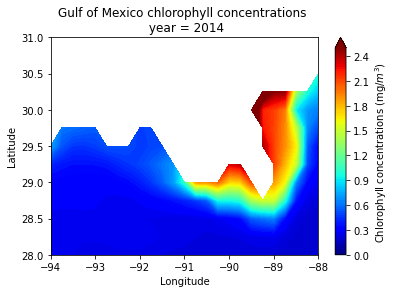

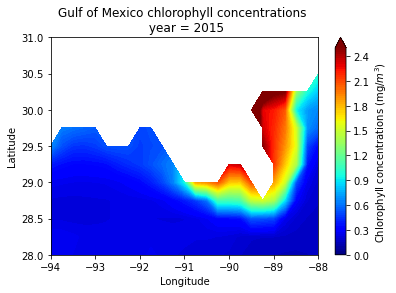

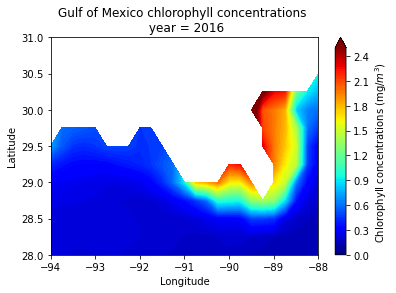

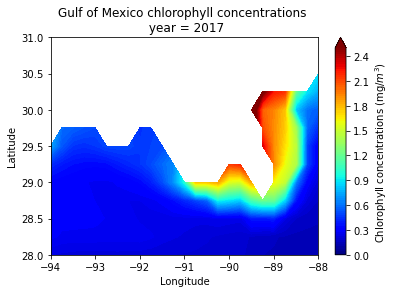

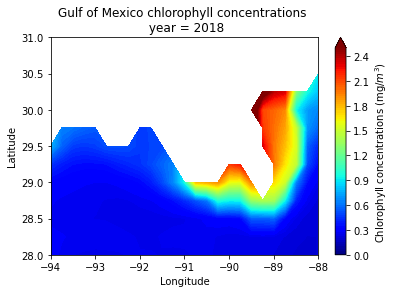

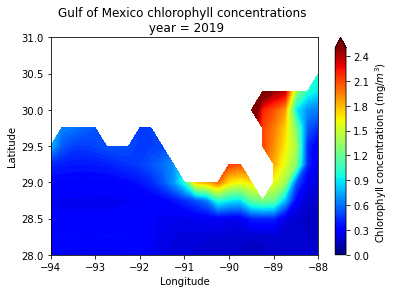

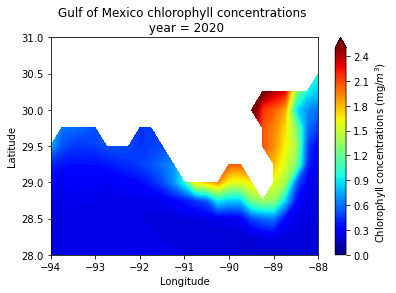

In [45]:
# Creating chlorophyll plots for each year
tick = [0,0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4]
rango = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for i in rango:
    mean.chl.isel(year=i, depth=0).plot.contourf(
        vmin=0, vmax=2.5, levels=100, cmap = 'jet',
        cbar_kwargs={"label": "Chlorophyll concentrations (mg/$m^3$)", 'ticks': tick}, 
        )
    
    axis = plt.gca()
    axis.set_xlabel("Longitude")
    axis.set_ylabel("Latitude")
    axis.set_title('Gulf of Mexico chlorophyll concentrations \n year = {}'.format(i+2005))
    
    plt.savefig("clorofila_{}".format(i), dpi=500)
    plt.show()
    plt.close("all")


In [4]:
# Creating nitrate plots for each year
tick = [0,5,10,15,20]
rango = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for i in rango:
    fg = mean.no3.isel(year=i, depth=0).plot.contourf(
         vmin=0, vmax=19, levels=100, cmap = 'viridis', 
         cbar_kwargs={"label": "Nitrate concentrations (mmol/$m^3$)",'ticks': tick}
         )
    
    axis = plt.gca()
    axis.set_xlabel("Longitude")
    axis.set_ylabel("Latitude")
    axis.set_title('Gulf of Mexico nitrate concentrations \n year = {}'.format(i+2005))

    plt.savefig("Figuras/no3_{}.png".format(i), dpi=500)
    
    #we could also do: 
    
    #plt.savefig("Figuras/no3_" + str(i) + ".png", dpi=500)
    #or
    #plt.savefig(f"Figuras/no3_{i}.png", dpi=500)
    


    plt.show()
    plt.close("all")

NameError: name 'mean' is not defined

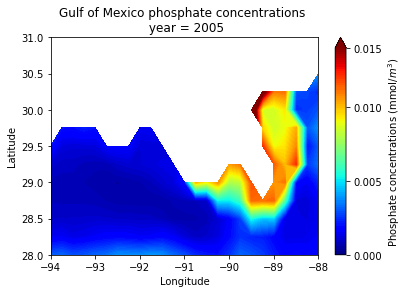

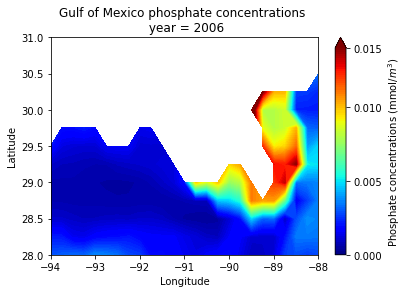

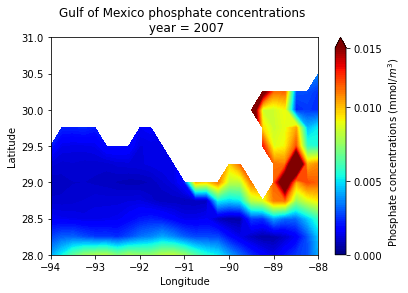

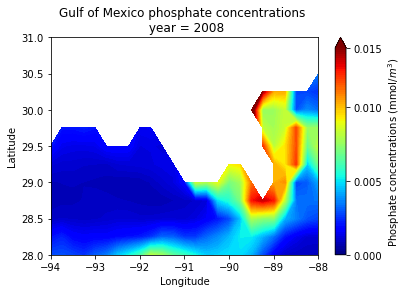

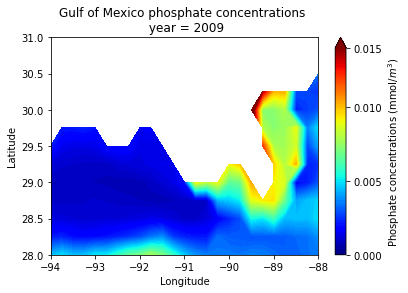

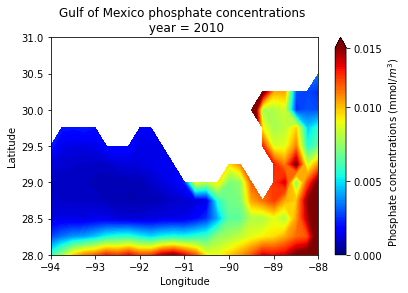

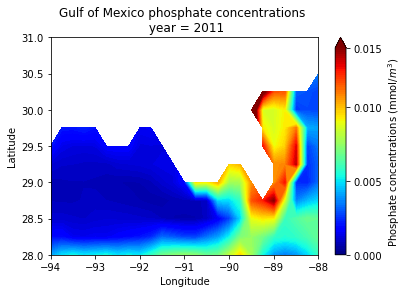

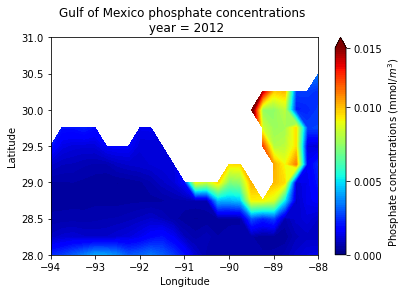

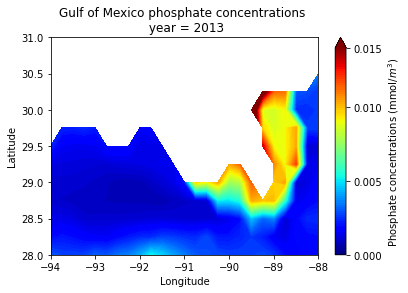

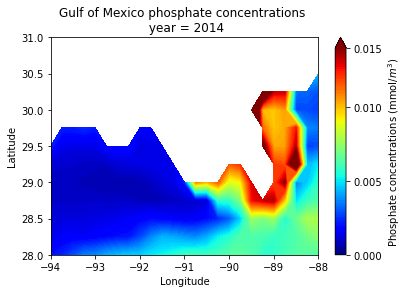

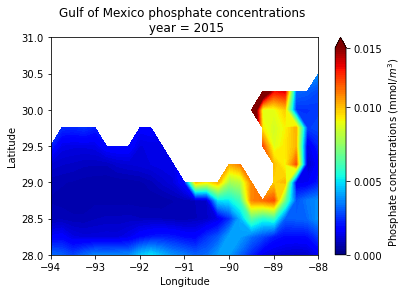

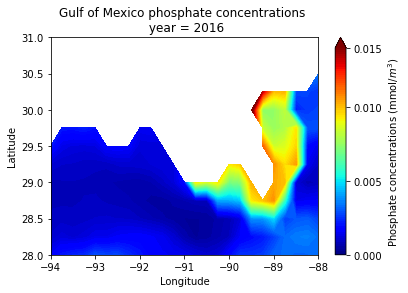

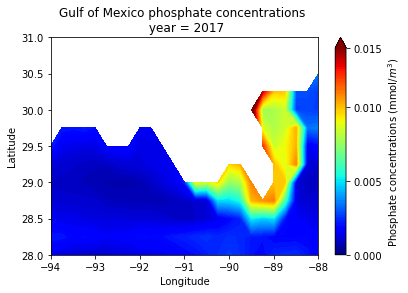

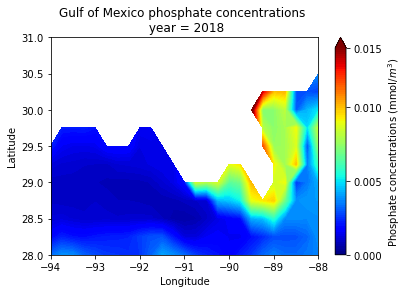

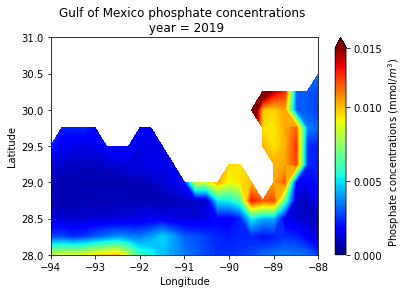

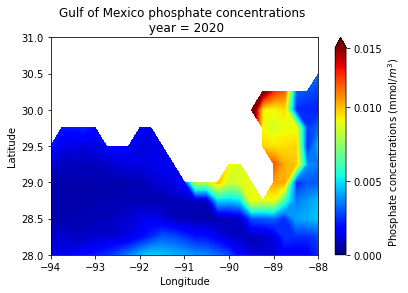

In [47]:
# Creating phosphate plots for each year
tick = [0, 0.005, 0.01, 0.015]
rango = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for i in rango:
    mean.po4.isel(year=i, depth=0).plot.contourf(
        vmin=0, vmax=0.014, levels=100, cmap = 'jet',
        cbar_kwargs={"label": "Phosphate concentrations (mmol/$m^3$)", 'ticks': tick}
        )
    
    axis = plt.gca()
    axis.set_xlabel("Longitude")
    axis.set_ylabel("Latitude")
    axis.set_title('Gulf of Mexico phosphate concentrations \n year = {}'.format(i+2005))

    plt.savefig("po4_{}".format(i), dpi=500)
    plt.show()
    plt.close("all")